In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from geoscripts import gchemplots as gp

In [35]:
# Import data
data = pd.read_excel('published/GS2385_SuppTablesS1-S6.xlsx',sheet_name='Table S2',header=7,index_col=5)
print(data.columns)

trexler = data[data.Reference=='this pub']
trexler.drop('CT15118',inplace=True)
print(trexler.index)

metadata = pd.read_excel('published/GS2385_SuppTablesS1-S6.xlsx',sheet_name='Table S1',header=2)
print(metadata.columns)

Index(['Reference', 'DataSource', 'Region', 'Lith', 'Detailed Lith', 'SiO2',
       'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'LOI', 'Total', 'Unnamed: 19', 'FeOt', 'Mg#', 'Unnamed: 22',
       'Ba', 'Ce', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'Gd', 'Hf', 'Ho',
       'La', 'Lu', 'Nb', 'Nd', 'Ni', 'Pb', 'Pr', 'Rb', 'Sc', 'Sm', 'Sr', 'Ta',
       'Tb', 'Th', 'Tm', 'U', 'V', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='object')
Index(['CT15015', 'CT15019', 'CT15038', 'CT15049', 'CT15051', '100711-1B'], dtype='object', name='Sample')
Index(['Date', 'Location', 'Latitude', 'Longitude', 'Elevation', 'Elevation.1',
       'Strike', 'Dip', 'Type', 'Facing'],
      dtype='object')


/tmp/ipykernel_62891/90294403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trexler.drop('CT15118',inplace=True)


In [36]:
# Additional processing
color_dict = {'Khaishi Core':'#88CCEE','Khaishi Limbs':'#44AA99','Idliani':'#117733','Jvari':'#999933','Lentekhi/Panaga':'#AA4499','Mazashi':'#882255','Tsageri-Khvamli':'#CC6677',
              np.nan:'#DDDDDD'}
sample_dict = {'CT15019':'Khaishi Core','CT15015':'Khaishi Limbs','CT15051':'Idliani','CT15049':'Jvari','CT15038':'Jvari','100711-1B':np.nan,'CT15118':np.nan}

sample_domains = [sample_dict[x] for x in trexler.index]
colors = [color_dict[x] for x in sample_domains]

<Axes: xlabel='$\\mathregular{SiO_2}$ (wt. %)', ylabel='$\\mathregular{Na{_2}O + K{_2}O}$ (wt. %)'>

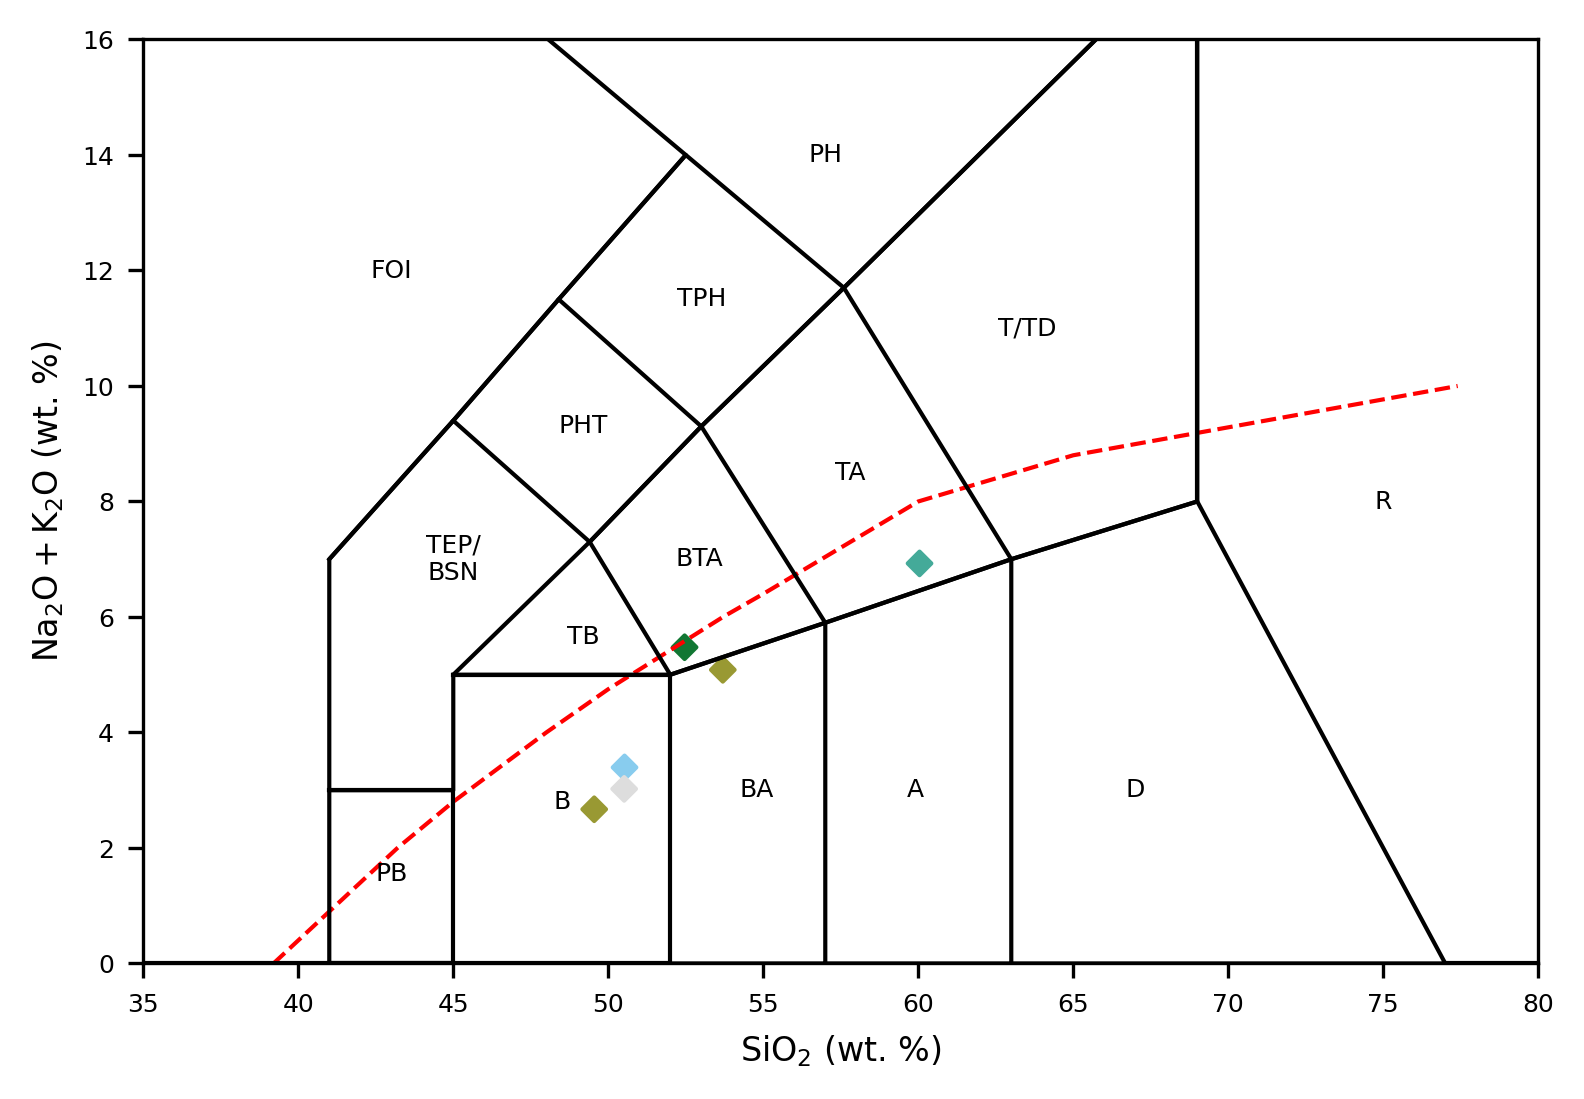

In [37]:
# Majors
fig,ax = plt.subplots(1,dpi=300,figsize=(6,4))
SiO2,Na2O,K2O = trexler[['SiO2','Na2O','K2O']].T.values.astype(float)
gp.TASsm(SiO2,Na2O,K2O,ax=ax,first=[],color=colors)

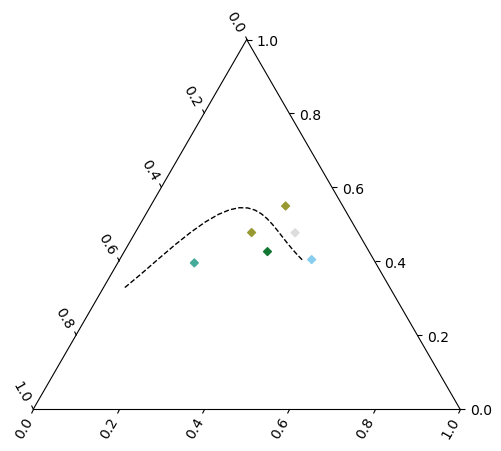

In [38]:
# AFM
fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')

Na2O,K2O,MgO,FeOt = trexler[['Na2O','K2O','MgO','FeOt']].T.values
gp.afm(Na2O=Na2O,K2O=K2O,MgO=MgO,FeOt=FeOt,ax=ax,first=[],color=colors)

fig.savefig('afm_trex.pdf')

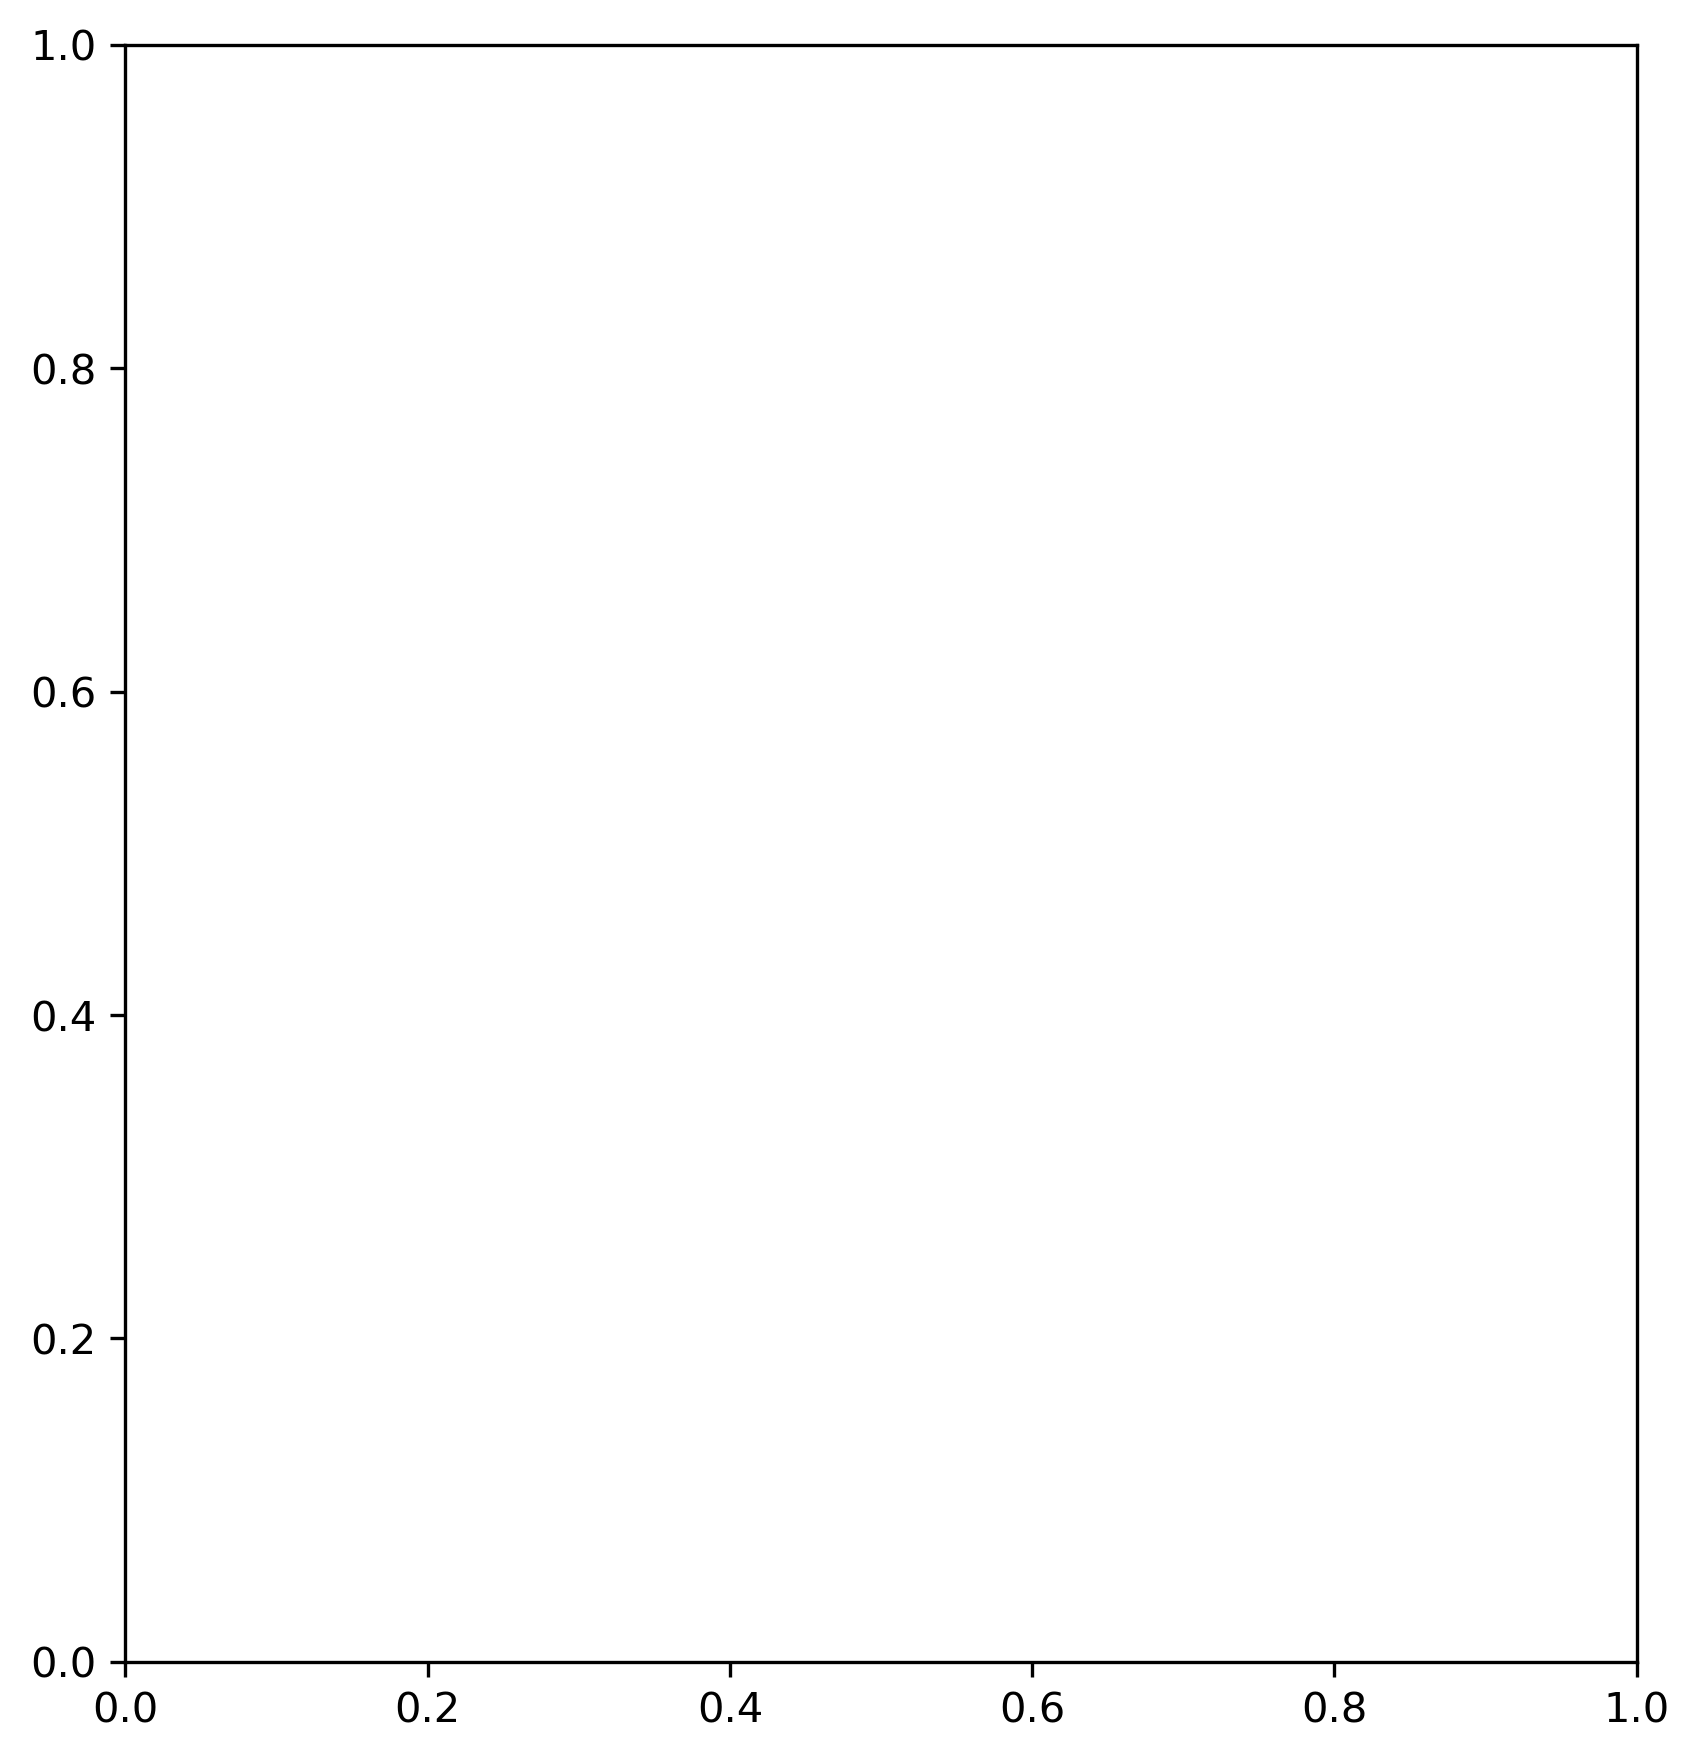

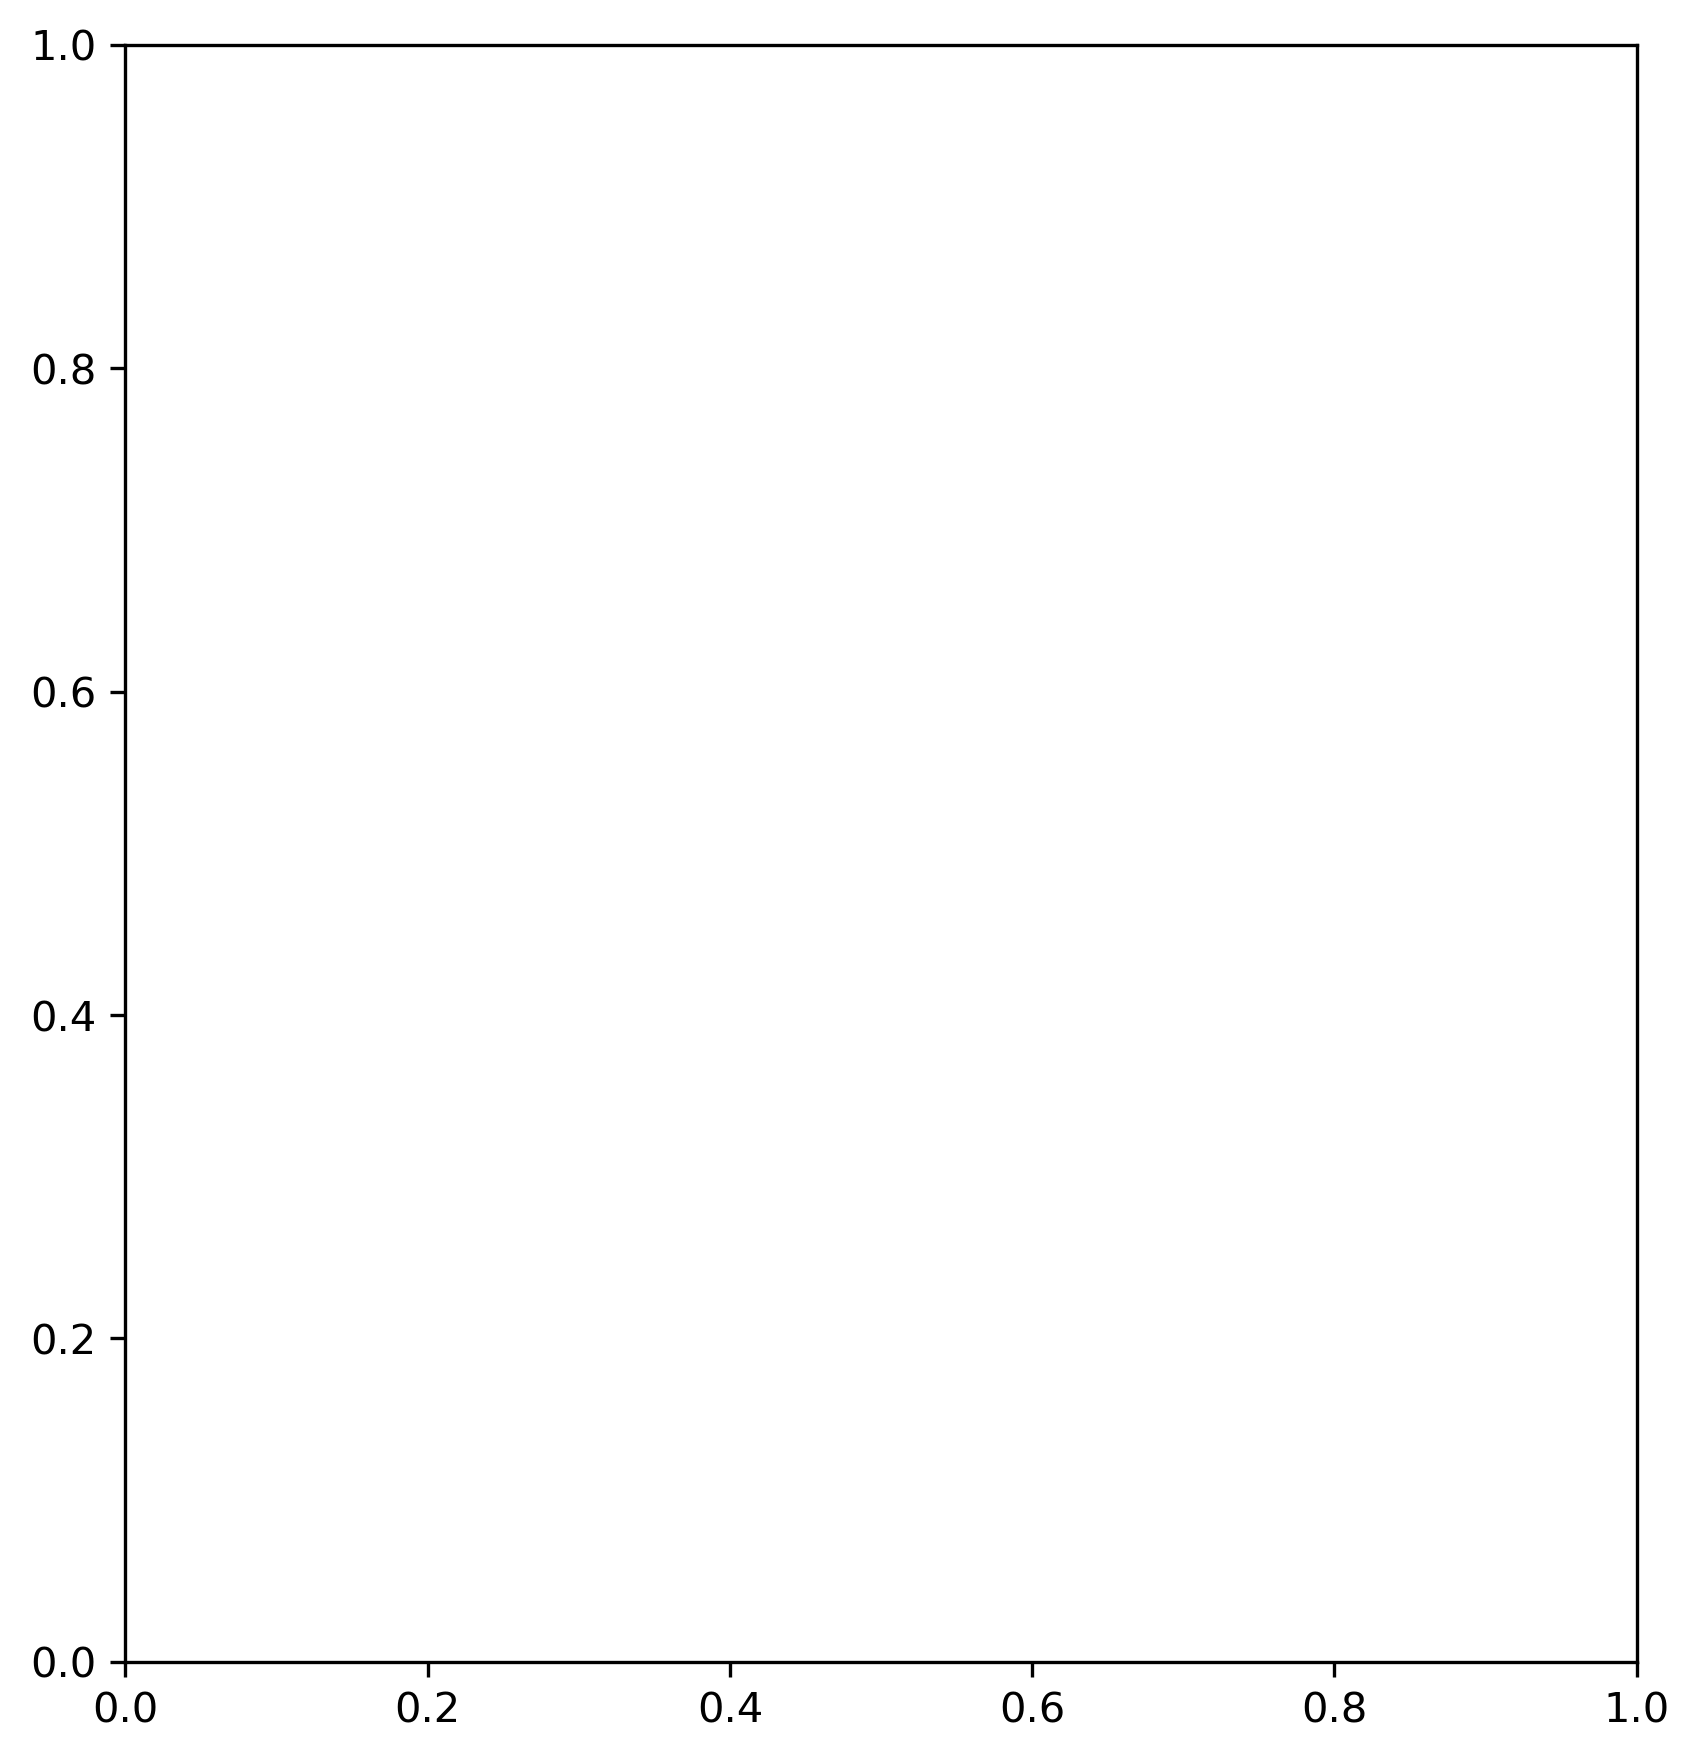

In [39]:
# Spiders
# Note, need to deal with Ti

fig0,ax0 = plt.subplots(1,figsize=(6.5,7),dpi=300)

fig1,ax1 = plt.subplots(1,figsize=(6.5,7),dpi=300)

#gp.REE(trexler,ax=ax0,color=colors)
#gp.immobile(trexler,ax=ax1,color=colors)

<TernaryAxes: tlabel='3Tb', llabel='Th', rlabel='2Ta'>

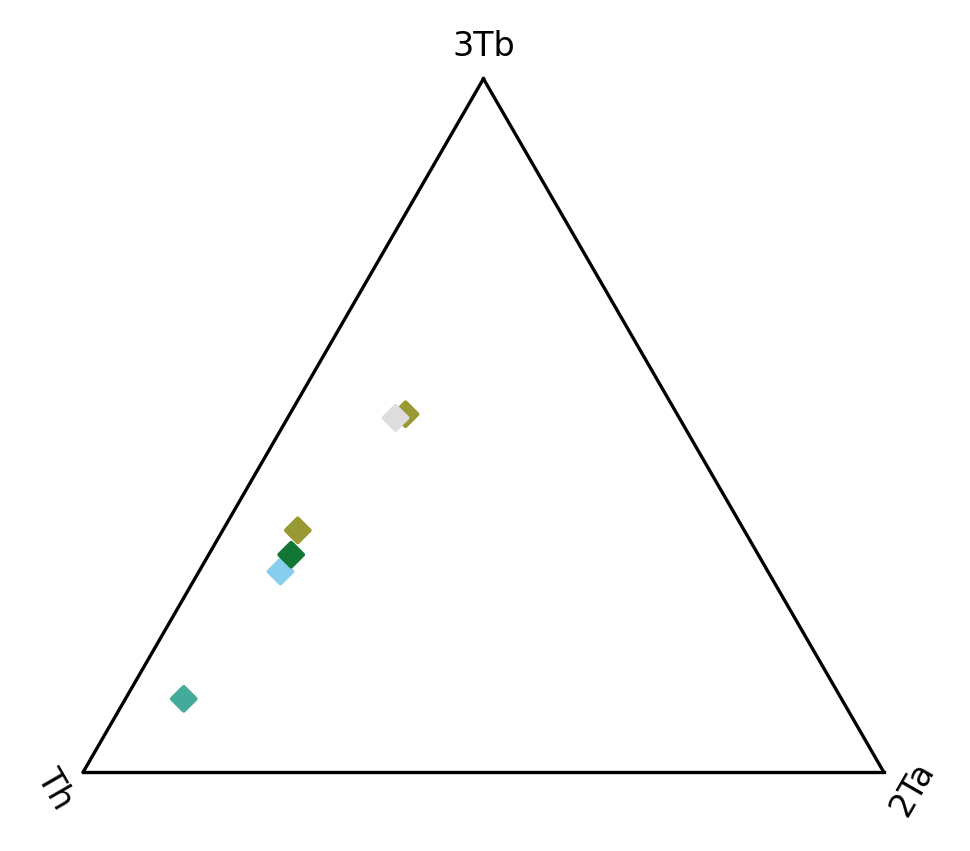

In [40]:
# Ternary
fig = plt.figure(figsize=(6.5,3),dpi=300)
ax = fig.add_subplot(111,projection='ternary')

Tb,Th,Ta = trexler[['Tb','Th','Ta']].T.values
gp.cabanis(Tb,Th,Ta,ax=ax,color=colors)